# Hotel Booking cancellation Prediction

# import important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read The data
hotel_booking=pd.read_csv("C:/Users/Vyankatesh Pandit/Downloads/hotel_bookings (2).csv")

# Data Cleaning

In [3]:
hotel_booking['total_people'] = hotel_booking['adults']+hotel_booking['children']+hotel_booking['babies']

In [4]:
hotel_booking.head()     #First Five Records

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [5]:
hotel_booking.tail()    #Last Five Records

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,2.0


In [6]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_booking.shape

(119390, 33)

In [8]:
hotel_booking.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [9]:
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotel_booking[['company','agent']] = hotel_booking[['company','agent']].fillna(0)     #Replacing Na with 0

In [11]:
hotel_booking.country= hotel_booking['country'].fillna('others')

In [12]:
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [13]:
hotel_booking.duplicated().sum()      #Calculating Total Duplicate Values

31994

In [14]:
hotel_booking.drop_duplicates(inplace = True)     #Drop Duplicate Values

In [15]:
hotel_booking.shape

(87396, 33)

In [16]:
hotel_booking.dropna(inplace=True)

In [17]:
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [18]:
hotel_booking['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'], [ 'No Meal', 'Bed and Breakfast', 'Full Board', 'Hald Board', 'No Meal'],inplace = True)

# Analysis on Hotel Types and cancellation Prediction

In [19]:
hotel_booking.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

<BarContainer object of 2 artists>

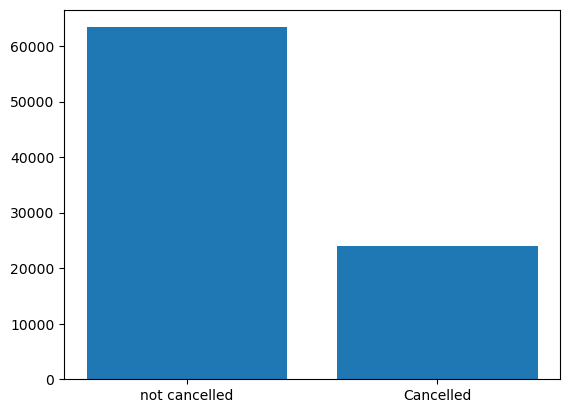

In [20]:
plt.bar(['not cancelled','Cancelled'],hotel_booking.is_canceled.value_counts())

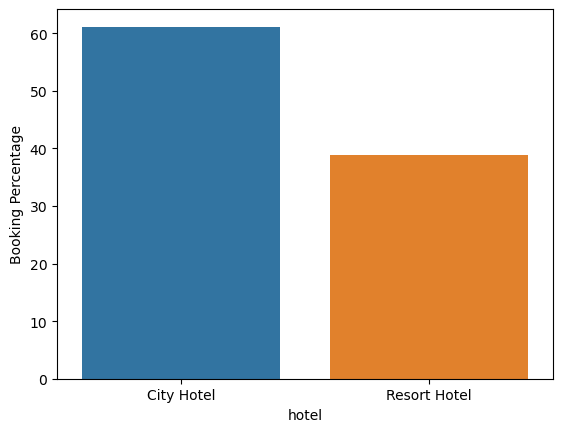

In [21]:
grouped_by_hotel = hotel_booking.groupby('hotel')           #Make group of hotel
d1 = pd.DataFrame((grouped_by_hotel.size()/hotel_booking.shape[0])*100).reset_index().rename(columns = {0:'Booking Percentage'})      #Calculating percentage
sns.barplot(x = d1['hotel'], y = d1['Booking Percentage'] ) 
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.


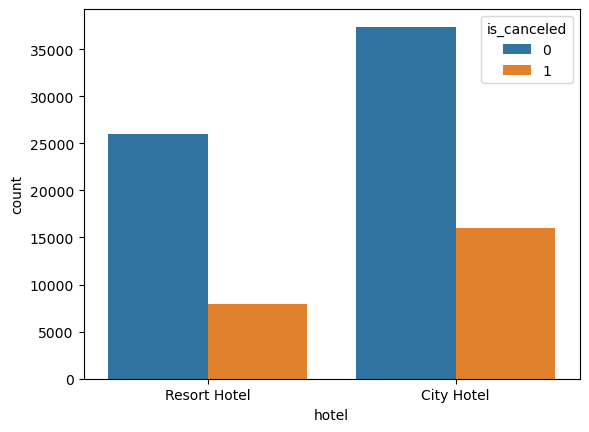

In [22]:
sns.countplot(x=hotel_booking.hotel, hue=hotel_booking.is_canceled)
plt.show()

Plot shows that cancellation and Reservation in City hotel is higher than Resort Hotel. But they must have to focus on ratio

In [23]:
cancelled_data_by_hotel = hotel_booking[hotel_booking['is_canceled'] == 1]
cancel_grp = cancelled_data_by_hotel.groupby('hotel')
Data1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})
grouped_by_hotel = hotel_booking.groupby('hotel')
total_booking = grouped_by_hotel.size()
Data2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
Data3 = pd.concat([Data1,Data2], axis = 1)
Data3['cancel_%'] = round((Data3['total_cancelled_bookings']/Data3['total_bookings'])*100,2)
Data3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16045,53424,30.03
Resort Hotel,7976,33968,23.48


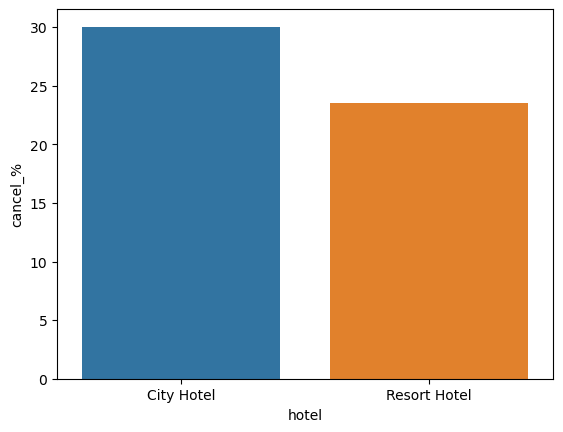

In [24]:
sns.barplot(x = Data3.index, y = Data3['cancel_%'])
plt.show()

Almost 30 % of City Hotel bookings got canceled. reason may be resort hotels are more expensive.
City hotels needs to be focused more seeing the cancellation ratio, may be in maintenance,facilities,etc

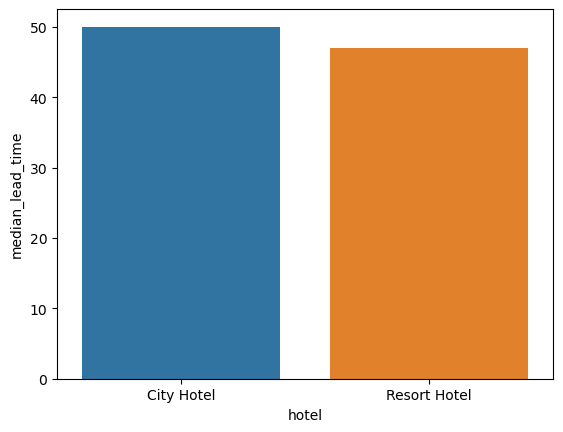

In [25]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

City hotel has higher lead time. Also median lead time is higher, this means customers generally plan their hotel visits way to early.

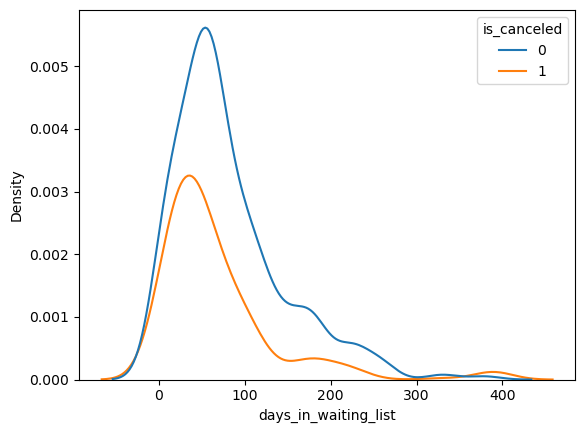

In [26]:
 # Selecting bookings with non zero waiting time
waiting_bookings = hotel_booking[hotel_booking['days_in_waiting_list'] !=0]  
sns.kdeplot(x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
plt.show()

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

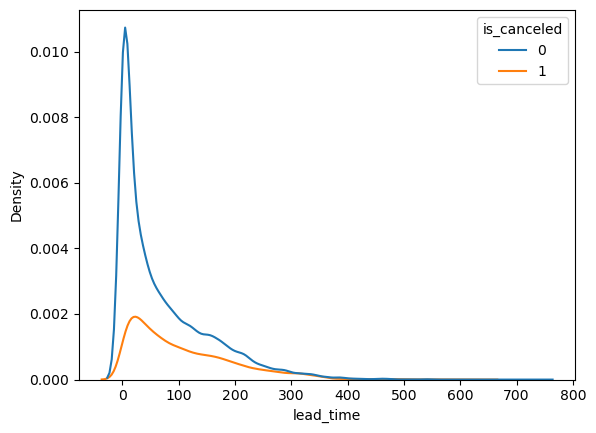

In [27]:
sns.kdeplot( x = hotel_booking['lead_time'], hue = hotel_booking['is_canceled'])

We see that most of the bookings that are cancelled have waiting period of less 150 days but also most of bookings that are not cancelled also have waiting period less than 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

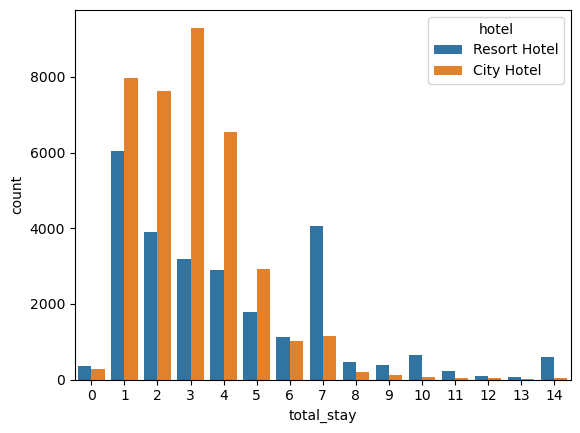

In [28]:
#Ananlysis By Total Number of Stays
hotel_booking['total_stay'] = hotel_booking['stays_in_weekend_nights']+hotel_booking['stays_in_week_nights']
not_canceled = hotel_booking[hotel_booking['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

# Analysis by foods

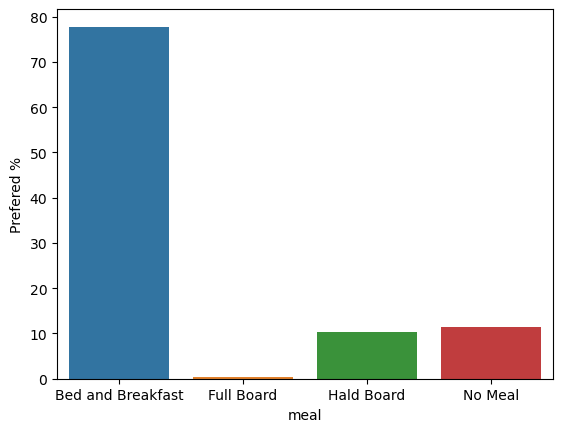

In [29]:
grouped_by_meal_type = hotel_booking.groupby('meal')           #Make group of hotel
d1 = pd.DataFrame((grouped_by_meal_type.size()/hotel_booking.shape[0])*100).reset_index().rename(columns = {0:'Prefered %'})      #Calculating percentage
sns.barplot(x = d1['meal'], y = d1['Prefered %'] ) 
plt.show()

Barplot shows that most of the customers prefer Bed and Breakfast

# Booking By Country

In [30]:
booking_by_country=hotel_booking.country.value_counts(normalize=True).rename_axis("country").reset_index(name="Percentage")
booking_by_country

,country,Percentage
0,PRT,0.314091
1,GBR,0.119382
2,FRA,0.101119
3,ESP,0.082982
4,DEU,0.061642
...,...,...
173,MMR,0.000011
174,BFA,0.000011
175,CYM,0.000011
176,MLI,0.000011


Portugal has highest reservation percentage among all countries

In [31]:
booking_by_country1=hotel_booking.country.value_counts().rename_axis("country").reset_index(name="Bookings")
booking_by_country1

,country,Bookings
0,PRT,27449
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
...,...,...
173,MMR,1
174,BFA,1
175,CYM,1
176,MLI,1


<AxesSubplot:>

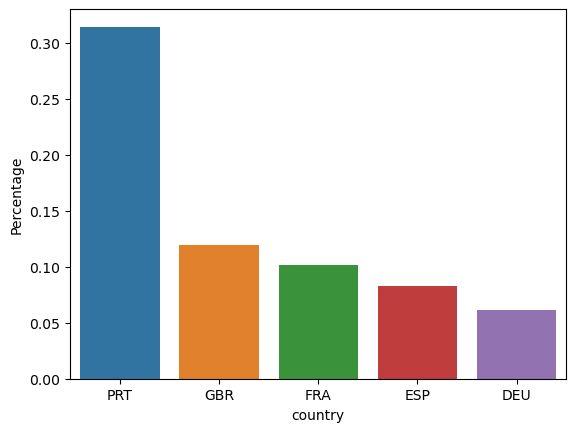

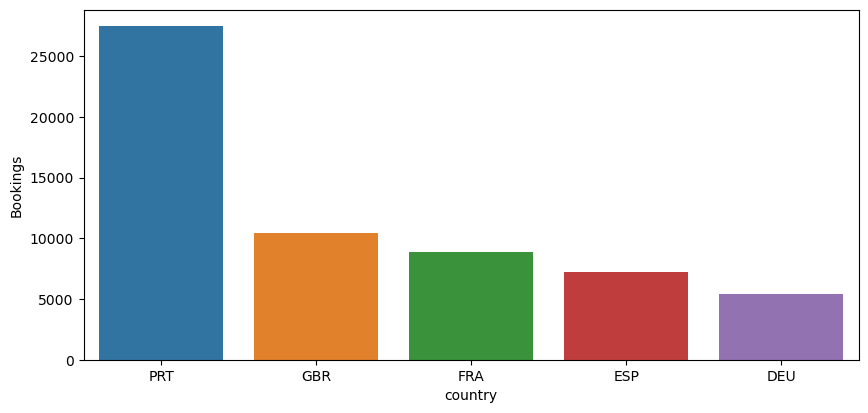

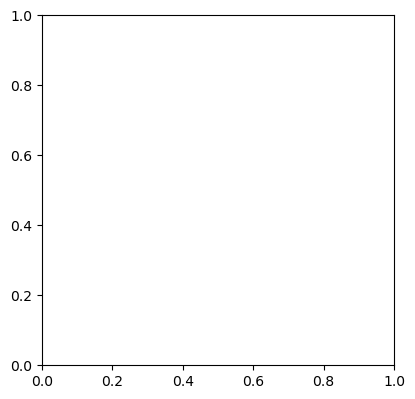

In [32]:
sns.barplot(x="country",y="Percentage",data=booking_by_country.head(5))
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.barplot(x="country",y="Bookings",data=booking_by_country1.head(5))
plt.figure(figsize=(10,10))
plt.subplot(2,2,2)

In [33]:
cancelled_data = hotel_booking[hotel_booking['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

PRT    9787
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
Name: country, dtype: int64

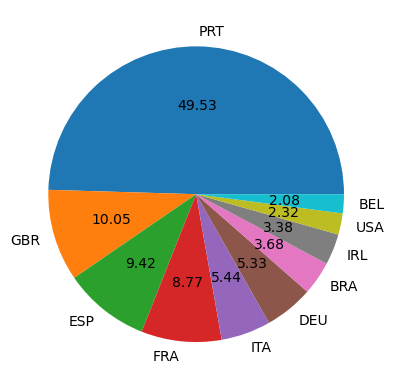

In [34]:
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

Portugal has highest cancellation. Portugal country must br focus on increase the facilities and decrease the prices, hold promotional campaigns, give discounts, advertisements, marketing

# Analysis by Agent and cancellation prediction

<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

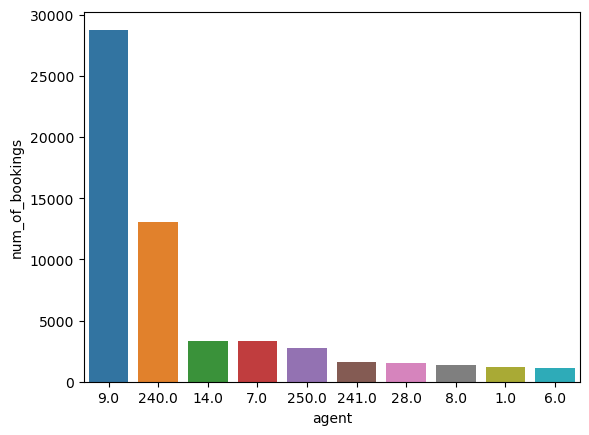

In [35]:
d1 = pd.DataFrame(hotel_booking.agent.value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1.agent == 0].index, inplace = True)            
d1 = d1[:10]                                                   
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

In [36]:
d2=hotel_booking.groupby(['agent','is_canceled']).count()['hotel'].reset_index().sort_values('hotel',ascending=False).reset_index(drop=True)
d2=d2[d2['is_canceled']==1]
del d2['is_canceled']
d2.columns=['agent','total_canceled_bookings']
d2

,agent,total_canceled_bookings
1,9.0,11523
4,240.0,4944
8,0.0,1555
16,14.0,582
17,250.0,494
...,...,...
521,331.0,1
525,411.0,1
526,111.0,1
530,405.0,1


In [37]:
d3=pd.merge(d1,d2,how='outer')
d3.fillna(0)

,agent,num_of_bookings,total_canceled_bookings
0,9.0,28758.0,11523
1,240.0,13028.0,4944
2,14.0,3348.0,582
3,7.0,3300.0,436
4,250.0,2779.0,494
...,...,...,...
213,331.0,0.0,1
214,411.0,0.0,1
215,111.0,0.0,1
216,405.0,0.0,1


In [38]:
d3["Percentage_canceled_booking"]=d3['total_canceled_bookings']/d3['num_of_bookings']*100
d3=d3.sort_values(['num_of_bookings'],ascending=False).head(10)

In [39]:
d3

,agent,num_of_bookings,total_canceled_bookings,Percentage_canceled_booking
0,9.0,28758.0,11523,40.068850
1,240.0,13028.0,4944,37.949033
2,14.0,3348.0,582,17.383513
3,7.0,3300.0,436,13.212121
4,250.0,2779.0,494,17.776178
5,241.0,1644.0,218,13.260341
6,28.0,1502.0,87,5.792277
7,8.0,1383.0,385,27.838033
8,1.0,1232.0,458,37.175325
9,6.0,1117.0,178,15.935542


<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

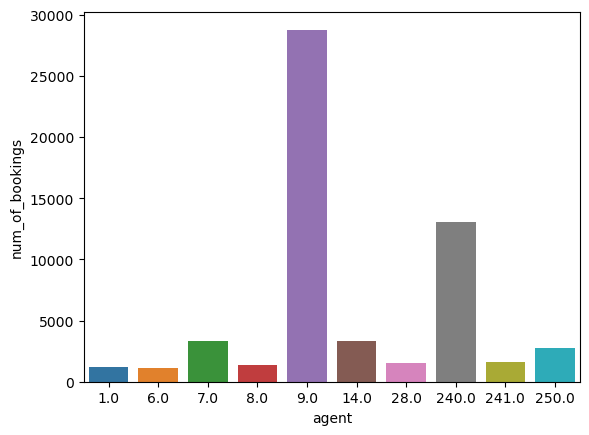

In [40]:
sns.barplot(x='agent',y='num_of_bookings',data=d3)

Agent 9 as highest number of booking

<AxesSubplot:xlabel='agent', ylabel='Percentage_canceled_booking'>

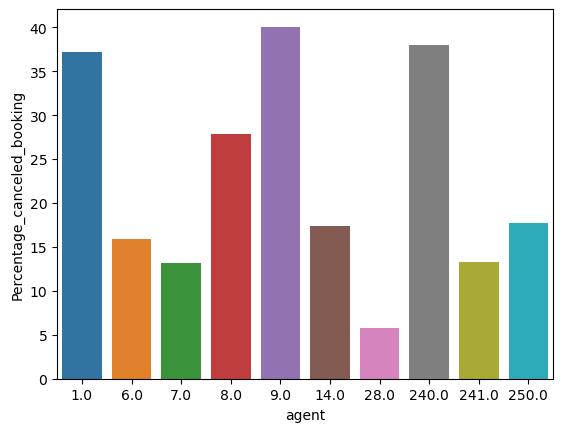

In [41]:
sns.barplot(x='agent',y='Percentage_canceled_booking',data=d3)

Agent 9 has highest number of cancellation after agent 1

# Analysis by Assigned rooms type to Customers

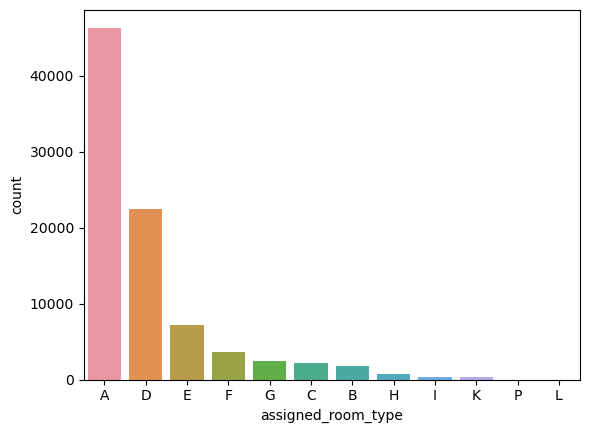

In [42]:
grp_by_room = hotel_booking.groupby('assigned_room_type')
hotel_booking['Num_of_bookings'] = grp_by_room.size()
sns.countplot(x = hotel_booking['assigned_room_type'],order = hotel_booking['assigned_room_type'].value_counts().index)
#sns.boxplot(x = hotel_booking['assigned_room_type'], y = hotel_booking['adr'])
plt.show()

In [43]:
hotel_booking.drop(hotel_booking[hotel_booking['adr'] > 5000].index,inplace=True)

<AxesSubplot:xlabel='assigned_room_type', ylabel='adr'>

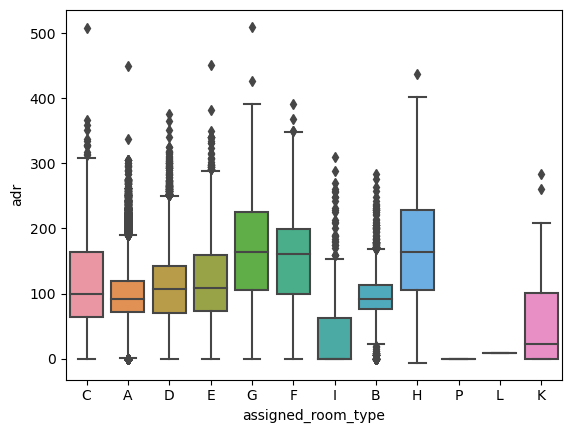

In [44]:
sns.boxplot(x = hotel_booking['assigned_room_type'], y = hotel_booking['adr'])

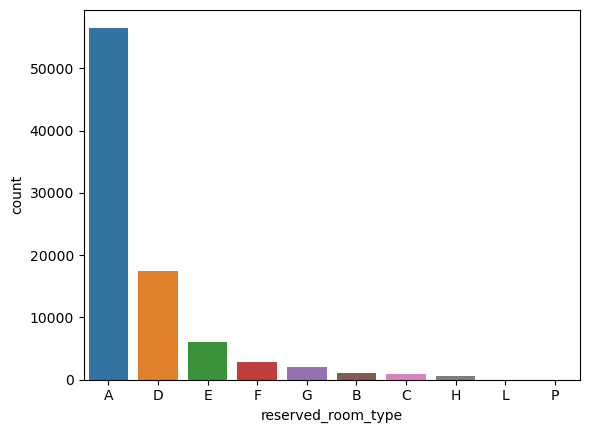

In [45]:
sns.countplot(x=hotel_booking['reserved_room_type'],order=hotel_booking['reserved_room_type'].value_counts().index)
plt.show()

it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.

# Analysis by distribution_channel

In [46]:
group_by_dc = hotel_booking.groupby('distribution_channel')
group_by_dc

([<matplotlib.patches.Wedge at 0x22400ae2310>,
 [Text(1.1308964633293177, 0.20874192015319185, 'Corporate'),
  Text(0.7744986776876613, 0.8500892884044973, 'Direct'),
  Text(0.30171126194523334, 1.1097163215954855, 'GDS'),
  Text(-0.9113289173874014, -0.7014125778267077, 'TA/TO'),
  Text(1.1499999999999657, 2.8095341687161304e-07, 'Undefined')],
 [Text(0.63920234883831, 0.11798456356484756, '5.81%'),
  Text(0.43776012217128674, 0.4804852499677592, '14.86%'),
  Text(0.1705324524038275, 0.627230964380057, '0.21%'),
  Text(-0.5150989533059225, -0.3964505874672695, '79.12%'),
  Text(0.6499999999999806, 1.5879975736221605e-07, '0.00%')])

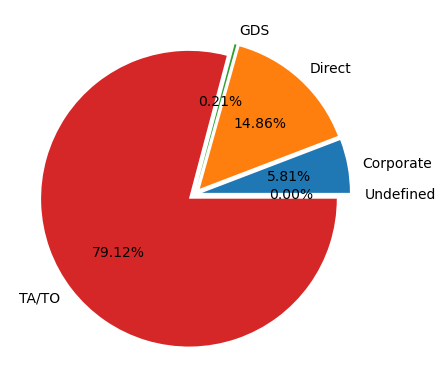

In [47]:
d1 = pd.DataFrame(round((group_by_dc.size()/hotel_booking.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels)

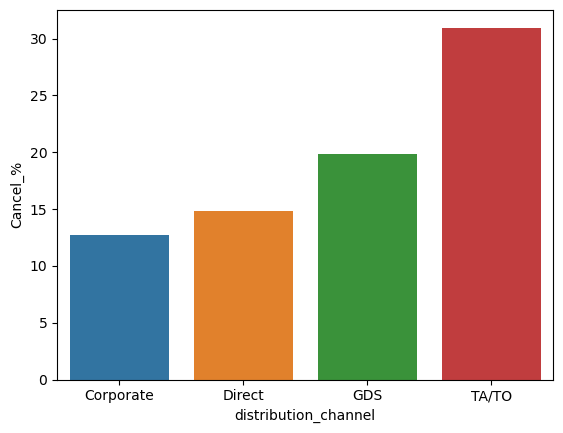

In [48]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

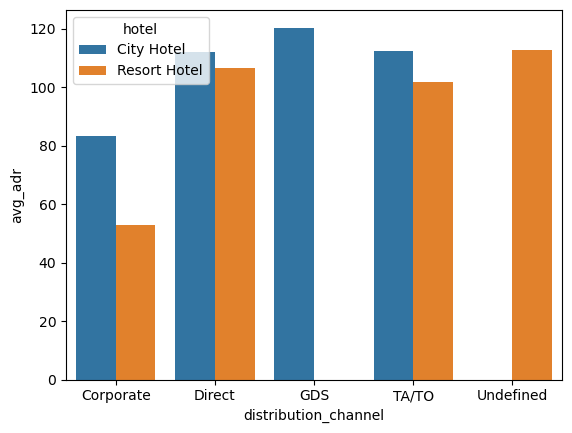

In [49]:
group_by_dc_hotel = hotel_booking.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'])
#plt.ylim(40,140)
plt.show()

GDS channel brings higher revenue generating deals for City hotel. City Hotel can work to on GDS channels to get more higher revenue.

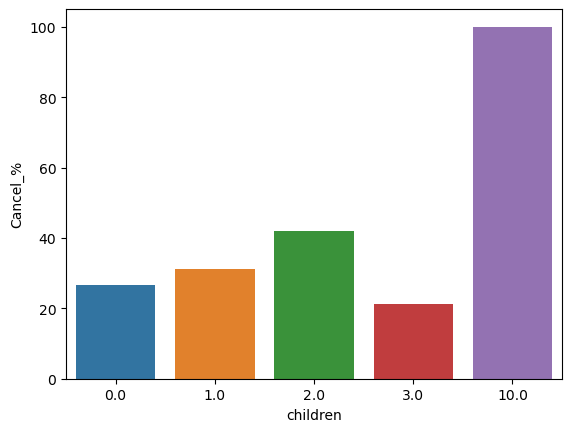

In [50]:
group_by_childern_Count = hotel_booking.groupby('children')
d1 = pd.DataFrame((group_by_childern_Count['is_canceled'].sum()/group_by_childern_Count.size())*100).rename(columns = {0: 'Cancel_%'})
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

# If Adults has 2 and 10 Childern then cancellation rate is high and 0 ,1 or 3 has a less cancellation Percentage

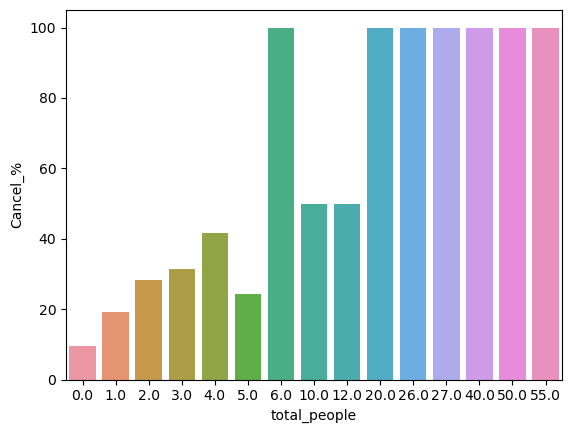

In [51]:
group_by_total_adults = hotel_booking.groupby('total_people')
d1 = pd.DataFrame((group_by_total_adults['is_canceled'].sum()/group_by_total_adults.size())*100).rename(columns = {0: 'Cancel_%'})
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

The barplot shows that 6 or more than 6 total person including adults, childern, baby have more cancellation percentage.

# Data Analysis with Date and Time

In [52]:
hotel_booking['reservation_status_date'] = pd.to_datetime(hotel_booking['reservation_status_date'], format = '%Y-%m-%d')

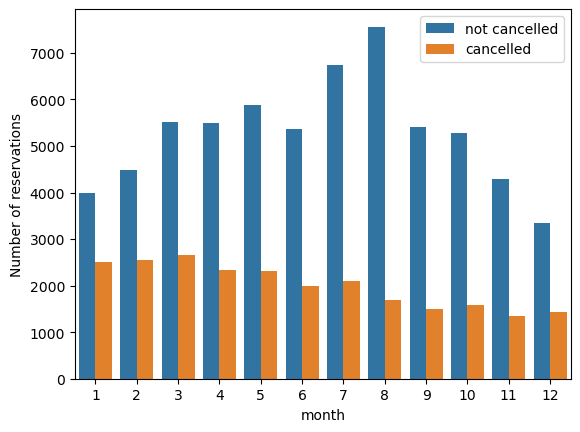

In [53]:
hotel_booking['month'] = hotel_booking['reservation_status_date'].dt.month
ax1 = sns.countplot(x='month',hue = 'is_canceled',data = hotel_booking)
plt.ylabel('Number of reservations')
plt.legend(['not cancelled','cancelled'])
plt.show()

march have a more cancellation and August have maximum reservation and minimum cancellation may be the prices are low in aug so more reservations. Also December have low number of reservation and in August , September have least cancellation.

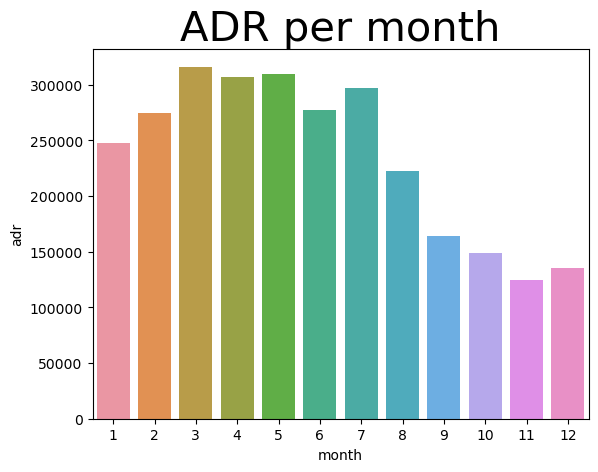

In [54]:
plt.title('ADR per month', fontsize=30)
adr_per_month = hotel_booking[hotel_booking['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=adr_per_month)
plt.show()

ADR after August are low,  in march is highest When higher prices the cancellations will be more

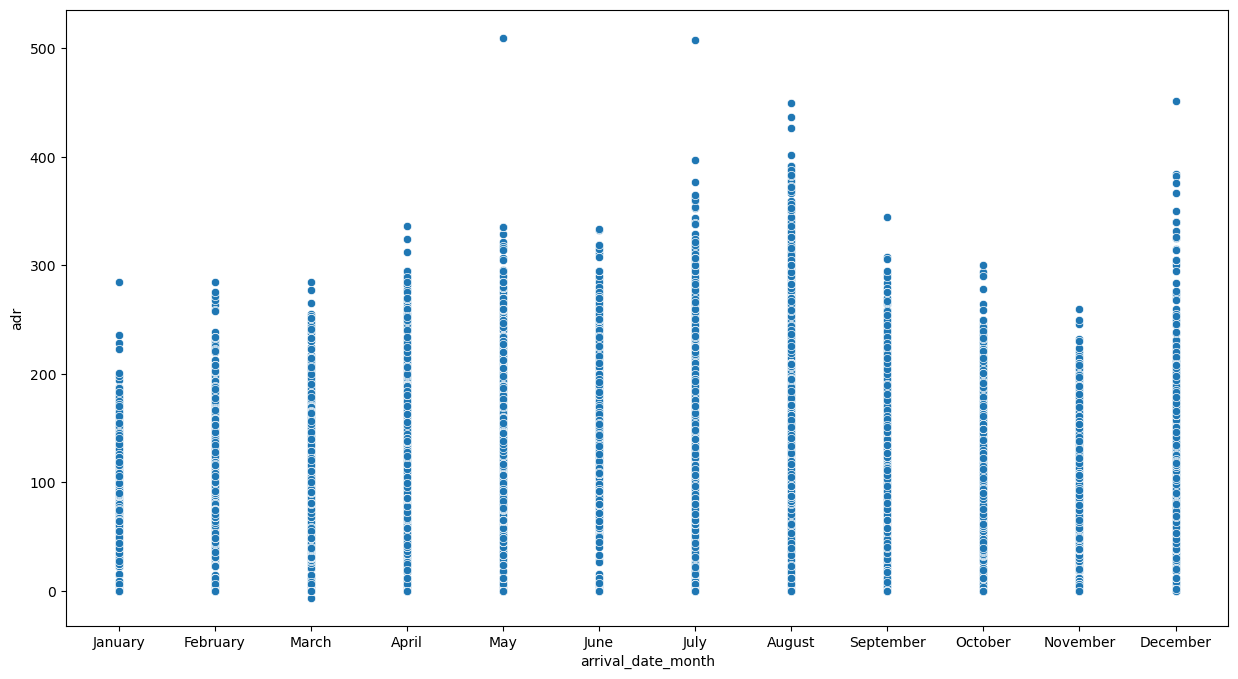

In [55]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize = (15,8))
hotel_booking['arrival_date_month'] = pd.Categorical(hotel_booking['arrival_date_month'],categories=reindex,ordered=True)
sns.scatterplot(x = hotel_booking['arrival_date_month'],y = hotel_booking['adr'])
plt.show()

average adr rises from beginning of year upto center of year and reaches top at August and then lowers to the end of the year.

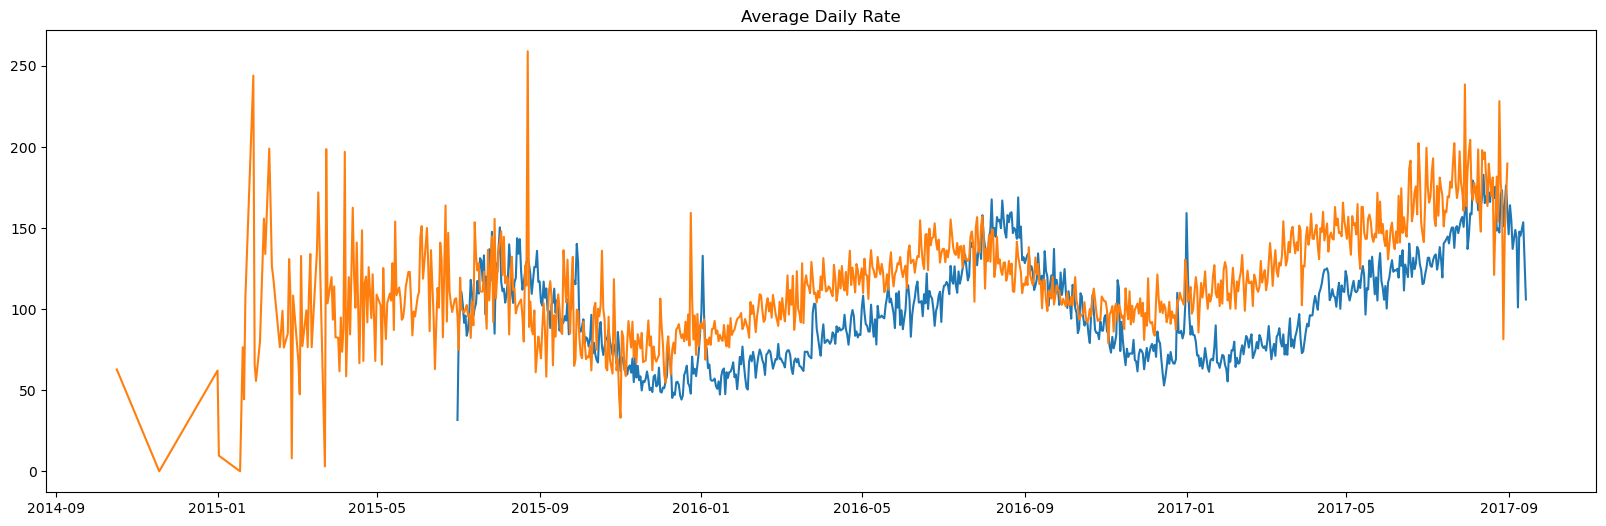

In [56]:
cancelled_data = hotel_booking[hotel_booking['is_canceled']==1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True) 
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = hotel_booking[hotel_booking['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize =(20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label= 'not cancelled') 
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label= 'cancelled')


We see that the cancelled line is more than the not cancelled one. It proves that the prices have effect on cancellation
Therefore, ADR is the most influencing factor on the cancellation rate

# Analysis By market Segment and cncellation

In [57]:
hotel_booking['market_segment'].value_counts()

Online TA        51617
Offline TA/TO    13888
Direct           11803
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Name: market_segment, dtype: int64

In [58]:
hotel_booking['market_segment'].value_counts(normalize = 'True')

Online TA        0.590644
Offline TA/TO    0.158918
Direct           0.135060
Groups           0.056550
Corporate        0.048197
Complementary    0.008033
Aviation         0.002598
Name: market_segment, dtype: float64

In [59]:
cancelled_data1 = hotel_booking[hotel_booking['is_canceled']==1]
cancelled_data2=cancelled_data1['market_segment'].value_counts(normalize = 'True').rename_axis("Market_Segment").reset_index(name="Percentage")
cancelled_data2

,Market_Segment,Percentage
0,Online TA,0.759534
1,Offline TA/TO,0.085845
2,Direct,0.072273
3,Groups,0.055579
4,Corporate,0.021232
5,Complementary,0.003664
6,Aviation,0.001873


<AxesSubplot:xlabel='Market_Segment', ylabel='Percentage'>

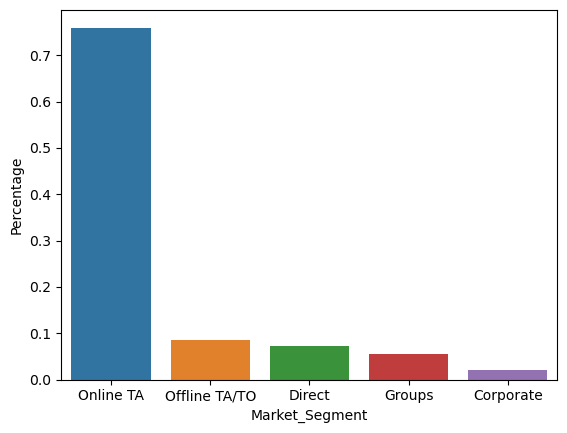

In [60]:
sns.barplot(x="Market_Segment",y="Percentage",data=cancelled_data2.head(5))

75% Customers are coming through online agents cancle their bookings. reasons might be online pictures are good but when  customers visit hotels then relity is different like food quality, facilities etc. S hotels must be avoid this